In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

# Pareto distribution
## Let's define $\xi$ as pareto random value

## comparing theoretical probability density function with histogram(sample) 

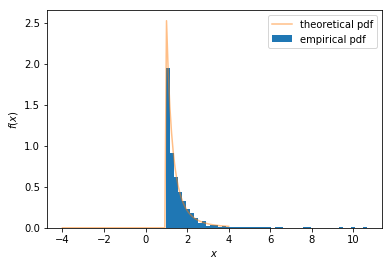

In [2]:
b=2.62
pareto_rv = sts.pareto(b)
sample = pareto_rv.rvs(1000)
plt.hist(sample,bins=50,normed=True,label='empirical pdf')

# Ð½Ð° Ñ‚Ð¾Ð¼ Ð¶Ðµ Ð³Ñ€Ð°Ñ„Ð¸ÐºÐµ Ð¿Ð¾ÑÑ‚Ñ€Ð¾Ð¸Ð¼ Ñ‚ÐµÐ¾Ñ€ÐµÑ‚Ð¸Ñ‡ÐµÑÐºÑƒÑŽ Ð¿Ð»Ð¾Ñ‚Ð½Ð¾ÑÑ‚ÑŒ Ñ€Ð°ÑÐ¿Ñ€ÐµÐ´ÐµÐ»ÐµÐ½Ð¸Ñ:
x = np.linspace(-4,4,100)
pdf = pareto_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## obtaining expactation and variance of pareto distribution

In [3]:
#Let's calculate expectation and variance
from scipy.stats import pareto

mean, var = pareto.stats(b, moments='mv')
print var

1.61019907469


In our case $x_{m}=1$
$$\mathbb {E} [X]={\frac {bx_{m}}{b-1}}$$
$$\mathrm {D} [X]=\left({\frac {x_{m}}{b-1}}\right)^{2}{\frac {b}{b-2}}$$


## We are trying to check Central limit theorem,wich states that 
$$ X_{n}\sim N(E\xi,\frac{D\xi}{n})    ,n \rightarrow \inf$$
Where $\bar X_{n}:=\sum_{k=1}^{n}x_{i}$

## here we define funtion to find sample mean (Ð²Ñ‹Ð±Ð¾Ñ€Ð¾Ñ‡Ð½Ð¾Ðµ ÑÑ€ÐµÐ´Ð½ÐµÐµ)

In [30]:
def s_mean(smpl,n):
    xn=0
    denom=float(n)
    for i in range(n):
        xn+=smpl[i]/denom
    return xn

## creating 3 arrays to store 1000 of generated samples(each consists of n[i] elements)

In [31]:
xn1=np.array([])
xn2=np.array([])
xn3=np.array([])
n=[10,50,1000]
for i in range(3):
    for k in range(1000):
        cdf = pareto_rv.rvs(n[i]) 
        if i==0 :
            xn1=np.append(xn1,s_mean(cdf,n[i]))
        elif i==1:
            xn2=np.append(xn2,s_mean(cdf,n[i]))
        else:
            xn3=np.append(xn3,s_mean(cdf,n[i]))


## That's it! Plotting and comparing histogram of s_variance's distribution with norm pdf ,to which it converges in measure(more precisely N(E$\xi$,$\frac{D\xi}{n}$))

## n[i] is number of elements in each of 1000 samples

## i=0;n[i]=10

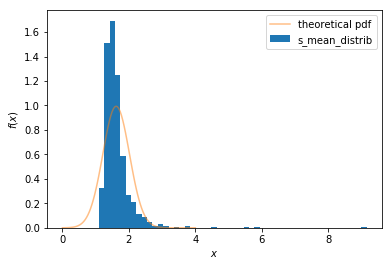

In [32]:
plt.hist(xn1,bins=50,normed=True,label='s_mean_distrib')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
i=0
norm_rv = sts.norm(mean, sqrt(var/n[i]))
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## i=1;n[i]=50

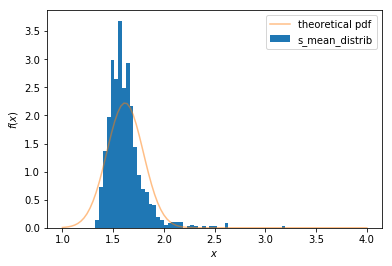

In [33]:
plt.hist(xn2,bins=50,normed=True,label='s_mean_distrib')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
i=1
norm_rv = sts.norm(mean, sqrt(var/n[i]))
x = np.linspace(1,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## i=2; n[i]=1000

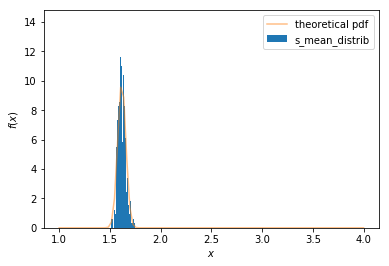

In [34]:
plt.hist(xn3,bins=100,normed=True,label='s_mean_distrib')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
i=2
norm_rv = sts.norm(mean,sqrt(var/n[i]))
x = np.linspace(1,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Conclusion

It seems that N(E$\xi$,$\frac{D\xi}{n}$) approximates distribution of sample variance well, only if we have n[i]>1000 ,where 
$\xi$ is pareto random value

Ð§ÐµÐ¼ Ð±Ð¾Ð»ÑŒÑˆÐµ n, Ñ‚ÐµÐ¼ Ñ‚Ð¾Ñ‡Ð½ÐµÐµ Ð°Ð¿Ð¿Ñ€Ð¾ÐºÑÐ¸Ð¼Ð°Ñ†Ð¸Ñ.